# Fashion-Mnist Data Analysis Report
## Ernie Tsai, ID: 91395650

## Introduction
Fashion-Mnist is split into two files, the training set and the test set. Each image have size 28x28 and are saved in the data files "fashion_mnist_test.csv" and "fashion_mnist_train.csv". The "fashion_mnist_train.csv" file contains a data set with shape (60000,784) and the "fashion_mnist_test.csv" has a shape(10000,784). In this report, I am going to train and compare the result of the data set using the following supervised and unsupervised model: Logistic Regression, Principle components(PCA), k-NN, K-Means, and lastly the Ternsorflow(with keras). In addition, the scripts below requires the following packages:pandas,numpy, matplotlib,seaborn, tensorflow, and sklearn.


## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plt

## Importing the dataset

In [ ]:
fashion_test = pd.read_csv("fashion-mnist_test.csv") #import test set
fashion_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
fashion_train= pd.read_csv("fashion-mnist_train.csv") #import train set
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing the Data
By executing the code below the X_train,y_train,x_test, and y_test will be created in numpy array format. The X_train and x_test contains  all the all columns except the "label" columnn of the two files.On the otherhand, the y_train and y_test contains the rows of the two files. The shape for each train and test are printed out as output from the command below.

In [ ]:
X_train= np.array(fashion_train.drop(['label'],axis=1) ) #drop the first column
x_test = np.array(fashion_test.drop(['label'],axis=1) )
y_train = np.array(fashion_train['label']) # Convert to numpy array, y train
y_test =np.array(fashion_test['label'])# Convert to numpy array, y test

In [ ]:
print("Train Y-train Shape="+ str(y_train.shape)) # Y-train Shape
print("Train X-train Shape="+ str(X_train.shape)) #Shape of x train
print("Test X-test Shape=" + str(x_test.shape))  #Shape of x test
print("Test Y-test Shape="+ str(y_test.shape)) # Y-test Shape

Train Y-train Shape=(60000,)
Train X-train Shape=(60000, 784)
Test X-test Shape=(10000, 784)
Test Y-test Shape=(10000,)


# Logistic Regression for classification
## Class for Logistic Regression
The class contains 6 different functions excluding the inti function. The six functions are fit, predict, score , sigma , loss and loss gradient.

In [ ]:
class myLogisticRegression():
    
    def __init__(self,learning_rate=.1):
    
        self.learning_rate=learning_rate

    def fit(self, data,y, n_iterations = 20):
        
        self.K = max(y)+1 #number of classes in y
        one = np.ones((data.shape[0],1)) #make column of ones using numpy
        X = np.concatenate((one,data),axis = 1) #Combine columns in one and data, augmented matrix, |tilde{X}
        eta =self.learning_rate
        W = np.zeros((np.shape(X)[1],max(y)+1)) #Set to zero,initialize beta
        # print("hi"), debugging purpose
        for k in range(n_iterations):
            dW=self.loss_gradient(W,X,y) #new function for gradient descent
            W=W-eta*dW # formula of gradient descent
            if k % 500==0: #show the loss for evert 500 steps
                print("loss after",k+1,"iterations is: ",self.loss(W,X,y))
                
        self.coeff=W
        
    def predict(self,data):
        ones=np.ones((data.shape[0],1)) #make column of ones using numpy
        X=np.concatenate((ones,data),axis=1) #Combine columns in one and data, augmented matrix, |tilde{X}
        W=self.coeff
        y_pred=np.argmax(self.sigma(X,W),axis=1) #Find the category with the greatest probability
        return y_pred
    
    def score(self,data,y_true):
        ones=np.ones((data.shape[0],1))#make column of ones using numpy
        X=np.concatenate((ones,data),axis=1) #Combine columns in one and data, augmented matrix, |tilde{X}
        y_pred=self.predict(data) #predict y given X
        acc=np.mean(y_pred==y_true) #correct prediction/N (mean)
        return acc
    
    def sigma(self,X,W): #softmax probability
        s=np.exp(np.matmul(X,W)) #exponential of the product X and W
        total=np.sum(s,axis=1).reshape(-1,1) #Sum up the columns in s and reshape
        return s/total
        
    def loss(self,W,X,y):
        f_value=self.sigma(X,W)
        K=self.K
        loss_vector=np.zeros(X.shape[0]) #Column of zeros
        for k in range(K):
            loss_vector+=np.log(f_value+1e-10)[:,k]*(y==k) #Avoid the ones with nan
        return -np.mean(loss_vector)
    
    def loss_gradient(self,W,X,y):
        f_value=self.sigma(X,W)
        K=self.K
        dLdW=np.zeros((X.shape[1],K)) #Column of zeros
        for k in range(K):
            dLdWk=(f_value[:,k]-(y==k)).reshape(-1,1)*X #Treat arrays with different shapes
            dLdW[:,k]=np.mean(dLdWk,axis=0)
        return dLdW

In [ ]:
clr = myLogisticRegression(learning_rate = 1e-4) #Set the learning rate to 0.001
clr.fit(X_train,y_train, n_iterations = 20000) #Fit the model to x and y train, run 20000 iterations

loss after 1 iterations is:  6.532929587423147
loss after 501 iterations is:  3.4980534534578807
loss after 1001 iterations is:  3.292480629689852
loss after 1501 iterations is:  4.169917399524098
loss after 2001 iterations is:  4.733251684237658
loss after 2501 iterations is:  3.6157740524918984
loss after 3001 iterations is:  3.8530574268431526
loss after 3501 iterations is:  4.058663889945653
loss after 4001 iterations is:  3.0725240472432223
loss after 4501 iterations is:  3.165872048566024
loss after 5001 iterations is:  2.68397721974515
loss after 5501 iterations is:  3.096489144981231
loss after 6001 iterations is:  2.6911737276211998
loss after 6501 iterations is:  3.781949567554182
loss after 7001 iterations is:  3.7847086272584756
loss after 7501 iterations is:  2.7409983962464297
loss after 8001 iterations is:  3.71751921177375
loss after 8501 iterations is:  2.8253543661715312
loss after 9001 iterations is:  2.766405771643008
loss after 9501 iterations is:  3.98441571405281

In [ ]:
clr.score(x_test,y_test)

0.7455

In [ ]:
clr.score(X_train,y_train)

0.75775

In [ ]:
clr.predict(x_test)

array([6, 1, 2, ..., 8, 6, 2], dtype=int64)

## Result
By the looking at the result provided by the model, you can tell that the train set with a score of 0.75775, did better than the test set, with a score of 0.7455. This shows that a good score in the train set doesn't necessarily mean tha the test set would perform the same or even better. In addition to the train set, 20000 iterations were performed on the train set with a learning rate of 1e-4(0.0001). As the you can see, the loss after 1 iteration began with 6.53292 and converged to 3.2062 after 19500 iterations. During the process of converging, 2.4899 was the lowest, but it went up again to 3. I am assuming that the learning rate should be changed in order to prevent the loss from going up and down. 

# Principal Component Analysis (PCA)
## Class for PCA
The class contains 2 functions, fit and transform, excluding the init function.

In [ ]:
class myPCA():
    
    def __init__(self,n_components=2):
        self.n_c=n_components
    def fit(self,X):
        cov_mat=np.cov(X.T) #Covariance matrix
        eig_val,eig_vec=np.linalg.eigh(cov_mat) #eigen values and vectors
        eig_val=np.flip(eig_val) #Change to descending order
        eig_vec=np.flip(eig_vec,axis=1) #Change to descending order
        self.eig_values=eig_val[:self.n_c]#Choose the top eigen values
        self.principle_components=eig_vec[:,:self.n_c] #Choose the top eigen values
        self.variance_ratio=self.eig_values/eig_val.sum() #Variance for each pca
        
    def transform(self,X):
        return np.matmul(X-X.mean(axis=0),self.principle_components) #Center

## Transform the Dimension

In [ ]:
pca = myPCA(n_components = 2) #Apply pca class on test set
pca.fit(x_test) #Fit the model the x test
X_pca = pca.transform(x_test) #transform dimension
X_pca

array([[ 1392.06491536,   333.90126126],
       [  -39.66153266,  1565.22871456],
       [ -828.82134219,   144.30363024],
       ...,
       [  254.32946961, -1012.85790544],
       [ 1529.89873218, -1356.97402438],
       [ 1941.98494742,  -173.30270289]])

## Plot the PCA

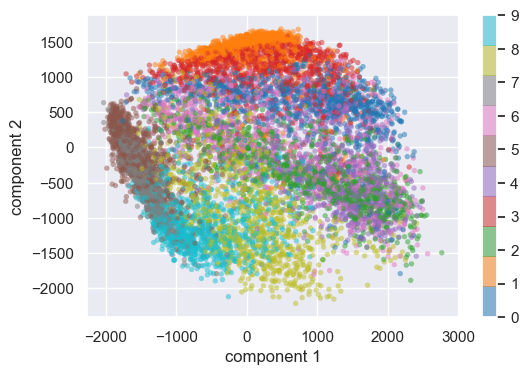

In [ ]:
import matplotlib.pyplot as plt #Plot the result of X_pca
import seaborn as sns ; sns.set()

figure=plt.figure(dpi=100)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_test,s=15,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('tab10',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# k-Nearest-Neighbors Classifier
Aside from the Logistic Regression alogrithm, k-NN(k-Nearest Neighbors classifier) is one of the powerful machine learning algorithm when it comes to supervised learning method. Although k-NN can be used for both Logistic Regression and classification problems, majority of people use it for classification problems which is why I am using it for this method for my dataset. How exactly does this method work? Let $x$ be a sample from the test datase and k be the number of neighbor points. First, the k-NN classifier identifies the number of $k$ points closest to the test value,$x$($N_x$). Then, it calculates the distance between these categories.The test value will then lie in the category that has the closest distance. Finally, the kNN classifier will estimate the probability that x belongs to class j with the function below.
##  \begin{gather}P_r(Y=j|X=x_o)= \frac{1}{k} \sum_{i\in{N_o}}I(y_i=j)\end{gather}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #kNN test
kn_clf=KNeighborsClassifier(n_neighbors=20)
kn_clf.fit(X_train,y_train) #Fit the model to the training set
kn_clf.score(ｘ_test,y_test) #Score for test set

0.8474

## Compare Test Scores
By looking at the test score of k-nearest neighbor classifier, we can high compare the the logistic regression model. Since kNN has a test score of 0.8474 and logistic regression has a test score of 0.7455, we can say that kNN has a higer accuracy than the logistic regression model.

# K-Means Clustering
K-Means Clustering is a well known unsupervised learning methods. It is a clustering algorithm that helps classify data points to different groups. Data points in different groups have their own unique properties or features. The K-means algorithm begin with selecting the number of groups and then randomly select their centroids. These centroids are the initial points for each cluster. Then, the data points are classified based on the distance between each point and the centroid for each group. Below is the formula that assigns each observation to the group that has the closest mean. 

##  \begin{gather}S_i^{(t)}=\{x_p:||x_p-m_i^{(t)}||^2\leq||x_p-m_j^{(t)}||^2 \forall j,1\leq j \leq k\}\end{gather}

After classifying the points, the centroid for each group will be recompute by taking the average of all the group's vectors. These steps are then repeated for serveral times until the group's centroid doesn's change significantly between each interations. Below is the formula that recalculate means for each group.

##  \begin{gather}m_i{(t+1)}=\frac{1}{|S_i^{(t+1)}|}\sum_{x_j\in{S_i^{(t)}}}x_j\end{gather}


In [ ]:
fashion_mnist_total=pd.concat([fashion_test,fashion_train]) #Combine the data to one
X= np.array(fashion_mnist_total.drop(['label'],axis=1)) #Find X and convert to numpy
y= np.array(fashion_mnist_total['label']) #Find y and convert to numpy

In [ ]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=10)
X_pca1=pca1.fit_transform(X) #transform dimension

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10,random_state=0) #Total of 10 groups
y_km=kmeans.fit_predict(X) #Predict y

### Result of the plot
The command below output 2 plots, the "K-means Clustering" and the "True Labels",after using PCA. On the right
side is the "True Labels" plot, it contains all the orginal data points that are scattered around in differnt places. On the left hand side, we have the "K-means Clustering" plot that groups the original data points into 10 differnt clusters and assign them with differnt colors. As you can see, the clustering was really successful due to the fact that same colors gathered together and formed a group.

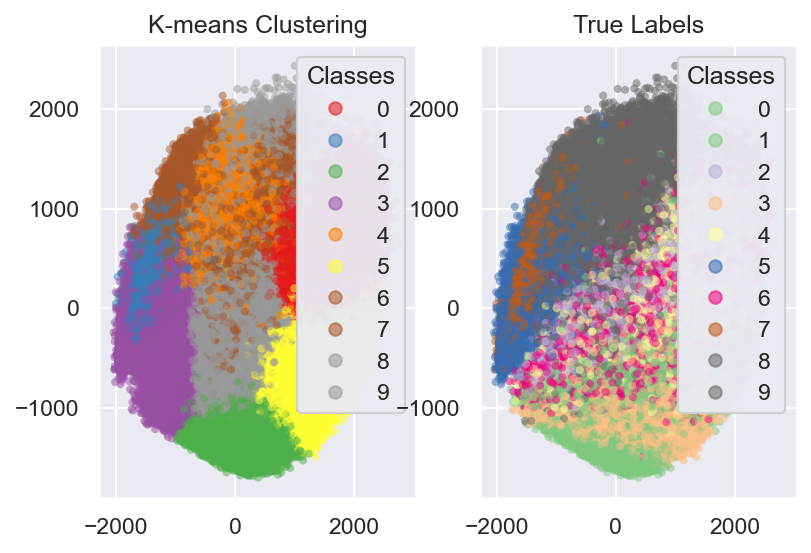

In [ ]:
import matplotlib.pyplot as plt #Plot the result of Kmeans after using PCA
import seaborn as sns ; sns.set()
fig,(ax1,ax2)=plt.subplots(1,2,dpi=150)
fig1=ax1.scatter(X_pca1[:,0],X_pca1[:,1],c=y_km,s=15,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('Set1',10)) #10 colors
fig2=ax2.scatter(X_pca1[:,0],X_pca1[:,1],c=y,s=15,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('Accent',10))
ax1.set_title('K-means Clustering')
legend1=ax1.legend(*fig1.legend_elements(),loc="best",title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2=ax2.legend(*fig2.legend_elements(),loc="best",title="Classes")
ax2.add_artist(legend2);

#Tensorflow
For the command below, we use Keras from the tensorflow package to train the model. 

In [ ]:
pip install tensorflow # install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X_train = X_train.reshape(60000, 784).astype("float32") / 255 #Reshape and convert to float
x_test = x_test.reshape(10000, 784).astype("float32") / 255 #Reshape and convert to float

In [ ]:
model=tf.keras.models.Sequential([
    #Transform the format of images from 2-D array to 1-D, reformats the data
    tf.keras.layers.Flatten(input_shape=(28,28)),#(input layer)
    #Sequence of dense layers
    tf.keras.layers.Dense(128,activation='relu'), #Layer with 128 nodes(inputlayer) 
    tf.keras.layers.Dense(64,activation='relu'), #Layer with 64 node(hidden layer)
    tf.keras.layers.Dense(32,activation='relu'), #Layer with 32 node(hidden layer)
    tf.keras.layers.Dense(10,activation='softmax') #Layer that returns logits array with length 10
    #Every node has a score marks the current image to one of the 10  classes
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Specify the training configuration
model.compile(optimizer='adam', #optimizer is how the model is updated based on the loss function and the data
              loss='sparse_categorical_crossentropy', #loss function measures the accuracy of the model when training
              metrics=['accuracy']) #metrics monitor the steps during training and testing

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32) #Training the model by fitting the model to the training data
model.evaluate(x_test,y_test) #Compare with the test set

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6850 - accuracy: 0.7645
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3887 - accuracy: 0.8584
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3553 - accuracy: 0.8696
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3210 - accuracy: 0.8808
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3027 - accuracy: 0.8887
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8960
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2638 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9018
Epoch 10/10
313/313 [==============================] - 0s 969us/step - loss: 0.311

[0.31157806515693665, 0.8928999900817871]

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8929
Test accuracy: 0.8928999900817871


 Since the test accuracy is 0.8928999 and training accuracy is 0.9098, the accuracy on the test set turns out to be slightly less than the accuracy on the training set. The difference between these to set represents overfitting. In addition, the loss is 0.3116.